In [1]:
import pandas as pd
import sklearn
from sklearn import metrics
import numpy as np
import seaborn as sns
import plotly.offline as pyoff
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
import plotly.offline as py 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff 
from IPython.display import display as d
from IPython.display import Audio



#import os


In [2]:
#from google.colab import drive

#drive.mount('/content/drive')

#os.chdir('/content/drive/MyDrive/Airbnb Project (574)')



In [3]:
data = pd.read_csv('Cleandata.csv')

data.drop(columns='Unnamed: 0',inplace=True)

/Users/adamtassabehji/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning:

Columns (1,2,11,13,14,15,16,17,26) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
data=data[data['last_scraped']>='2019-05-01']

In [5]:
## Converting Dates

data=data[(data.last_scraped!='f')&(data.last_scraped!='t')]

data['last_scraped'] = data['last_scraped'].str[:7]

data['host_since'] = data['host_since'].str[:7]

##Binary Covid Variable

data['Covid'] = pd.to_datetime(data['last_scraped'])

data['Covid']=np.where(data.Covid>='2020-03-01',1,0)

In [6]:
## Super host

data['host_is_superhost']=data['host_is_superhost'].map({"f":0,'t':1}).fillna(0) 

In [7]:
## Room Type

data['private_room']=data['room_type'].apply(lambda x:1 if x=="Private room" else 0)
data['entire_house']=data['room_type'].apply(lambda x:1 if x=="Entire home/apt" else 0)
data['shared_room']=data['room_type'].apply(lambda x:1 if x=="Shared room" else 0)

In [8]:
## instant_bookable

data['instant_bookable']=data['instant_bookable'].map({"f":0,'t':1}).fillna(0) 

In [9]:
## host_profile_pic

data['host_has_profile_pic']=data['host_has_profile_pic'].apply(lambda x:1 if x=="t" else 0)

In [10]:
## host_identity_verified

data['host_identity_verified']=data['host_identity_verified'].apply(lambda x:1 if x=="t" else 0)

In [11]:
data=data.drop(['room_type'], axis=1)
#data=(data.dropna())

In [12]:
## converting columns into numeric 
for col in data.columns:
    if col not in ['last_scraped' ,'host_since','neighbourhood_cleansed']:
        data[col]=pd.to_numeric(data[col])

In [13]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

In [14]:
resumetable(data)

Dataset Shape: (801168, 29)


,Name,dtypes,Missing,Uniques
0,id,float64,0,81992
1,host_id,float64,0,39888
2,last_scraped,object,0,21
3,host_since,object,1098,152
4,host_is_superhost,float64,0,2
5,host_listings_count,float64,1158,402
6,host_has_profile_pic,int64,0,2
7,host_identity_verified,int64,0,2
8,neighbourhood_cleansed,object,60,267
9,accommodates,float64,60,23


In [41]:
data.columns

Index(['id', 'host_id', 'last_scraped', 'host_since', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'instant_bookable', 'availability_365', 'Covid', 'private_room',
       'entire_house', 'shared_room'],
      dtype='object')

In [49]:
cdata=data[data.Covid==1]
pdata=data[data.Covid!=1]

In [188]:
pd.pivot_table(data, index = ['Covid','host_is_superhost'],
               values='reviews_per_month',
               aggfunc = 'mean').reset_index()

,Covid,host_is_superhost,reviews_per_month
0,0,0.0,1.474195
1,0,1.0,2.664422
2,1,0.0,1.146426
3,1,1.0,2.204555


In [18]:
2.2/1.14

1.929824561403509

In [17]:
2.66/1.47

1.8095238095238098

In [ ]:
cdata['reviews_per_month']

[[Text(0, 0, 'Pre'), Text(1, 0, 'Post')]]

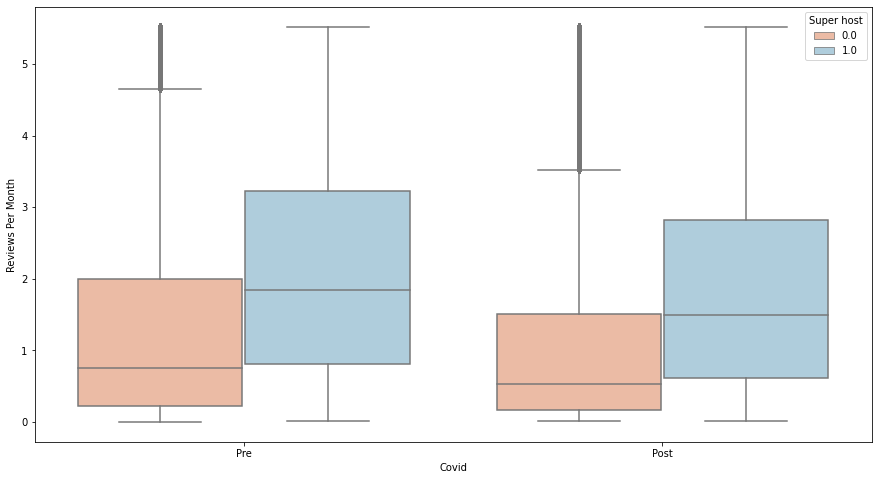

In [217]:
boxviz=data.copy()

boxviz = boxviz[boxviz['reviews_per_month'].between
                        (boxviz['reviews_per_month'].quantile(0), 
                         boxviz['reviews_per_month'].quantile(.95))]




plt.figure(figsize=(15,8))
fig = sns.boxplot(
    data=boxviz, 
    x='Covid', 
    y='reviews_per_month', 
    hue="host_is_superhost",
    palette="RdBu",
)

leg = fig.get_legend()
plt.legend(title='Super host',loc='upper right')



fig.set(ylabel='Reviews Per Month')




fig.set(xticklabels=['Pre','Post'])


In [51]:
print(smf.ols(formula='reviews_per_month ~ review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location',data=pdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1171.
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:06:36   Log-Likelihood:            -7.0620e+05
No. Observations:              337413   AIC:                         1.412e+06
Df Residuals:                  337408   BIC:                         1.412e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [52]:
print(smf.ols(formula='reviews_per_month ~ review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location',data=cdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     972.3
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:06:36   Log-Likelihood:            -5.6500e+05
No. Observations:              287622   AIC:                         1.130e+06
Df Residuals:                  287617   BIC:                         1.130e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [53]:
viz=pd.DataFrame()
viz['Review Score']=['Cleanliness','Check In','Communication','Location','Cleanliness','Check In','Communication','Location']
viz['scores']=[0.1797 , 0.0212,0.0576,0.0437,0.1576 ,0.0263  , 0.0315, 0.0265 ]
viz['Covid']=['Pre','Pre','Pre','Pre','Post','Post','Post','Post' ]


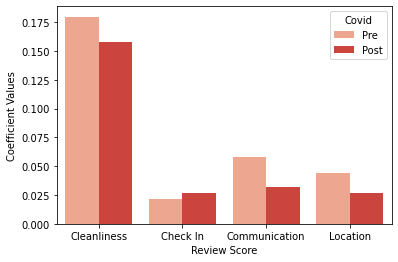

In [186]:

fig=sns.barplot(data=viz,
                x ='Review Score',
            y = 'scores',
                hue='Covid',
                palette='Reds')



fig.set(ylabel='Coefficient Values')
plt.show()

In [63]:
top5hoods = data[data.neighbourhood_cleansed.isin(data.neighbourhood_cleansed.value_counts().head().index)]

In [64]:
data.head()

,id,host_id,last_scraped,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,accommodates,...,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,availability_365,Covid,private_room,entire_house,shared_room
802249,109.0,521.0,2019-05,2008-06,0.0,1.0,1,1,Culver City,6.0,...,8.0,10.0,8.0,0.02,0.0,33.0,0,0,1,0
802250,344.0,767.0,2019-05,2008-07,0.0,1.0,1,1,Burbank,6.0,...,10.0,10.0,9.0,0.17,1.0,0.0,0,0,1,0
802251,2708.0,3008.0,2019-05,2008-09,1.0,2.0,1,1,Hollywood,1.0,...,10.0,10.0,10.0,0.30,1.0,277.0,0,1,0,0
802252,2732.0,3041.0,2019-05,2008-09,0.0,2.0,1,0,Santa Monica,1.0,...,10.0,10.0,9.0,0.19,0.0,281.0,0,1,0,0
802253,2864.0,3207.0,2019-05,2008-09,0.0,1.0,1,1,Bellflower,2.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0,0,1,0


In [65]:
top5countrevs=pd.pivot_table(top5hoods, index = ['last_scraped','neighbourhood_cleansed'],values='reviews_per_month',aggfunc = 'sum').reset_index()

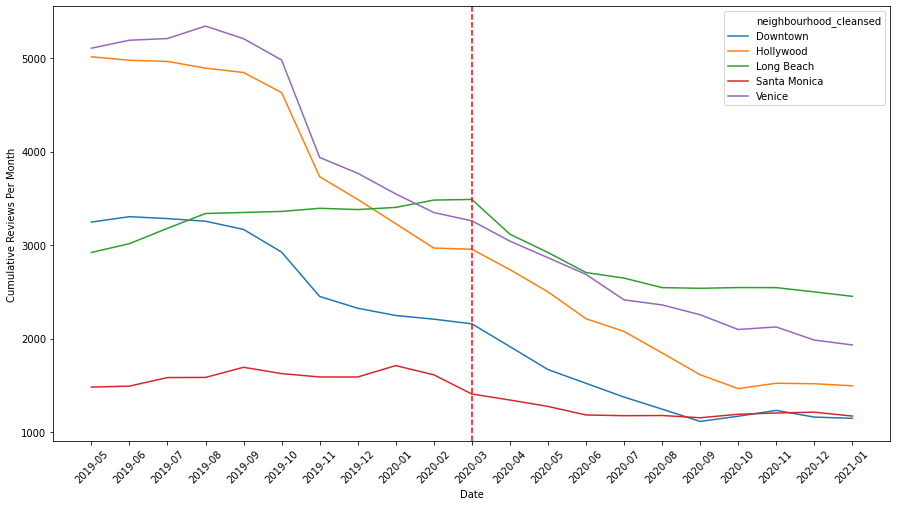

In [66]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(data =top5countrevs, x='last_scraped',y='reviews_per_month' , hue='neighbourhood_cleansed')
plt.xticks(rotation=45)
fig.set(xlabel='Date')

plt.ylabel('Cumulative Reviews Per Month')
covid  = plt.axvline(x='2020-03',linestyle='--')
covid.set_color('red')
plt.show()

In [67]:
top5countrevs

,last_scraped,neighbourhood_cleansed,reviews_per_month
0,2019-05,Downtown,3246.00
1,2019-05,Hollywood,5014.34
2,2019-05,Long Beach,2920.88
3,2019-05,Santa Monica,1480.93
4,2019-05,Venice,5106.07
5,2019-06,Downtown,3303.73
6,2019-06,Hollywood,4977.18
7,2019-06,Long Beach,3015.12
8,2019-06,Santa Monica,1490.97
9,2019-06,Venice,5191.34


In [122]:
print(smf.ols(formula='reviews_per_month~number_of_reviews',data=pdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 2.108e+05
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:42:10   Log-Likelihood:            -6.3830e+05
No. Observations:              343350   AIC:                         1.277e+06
Df Residuals:                  343348   BIC:                         1.277e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1078      0.00

In [124]:
0.019/0.0173

1.0982658959537572

In [123]:
print(smf.ols(formula='reviews_per_month~number_of_reviews',data=cdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                 2.785e+05
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:42:21   Log-Likelihood:            -4.8208e+05
No. Observations:              293452   AIC:                         9.642e+05
Df Residuals:                  293450   BIC:                         9.642e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7770      0.00

In [27]:
0.5691/0.2597

2.1913746630727764

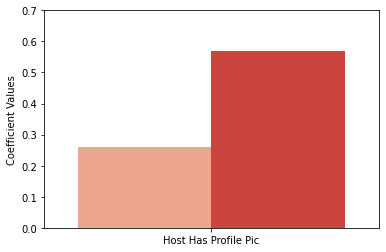

In [149]:
cod=['Pre','Post']
Cof=['Host Has Profile Pic','Host Has Profile Pic']
res=[0.2597,0.5691]


fig=sns.barplot(x =Cof,y = res,hue=cod,
                palette='Reds')

fig.set_ylim(0,0.7)
leg = fig.get_legend().remove()


fig.set(ylabel='Coefficient Values')
plt.show()

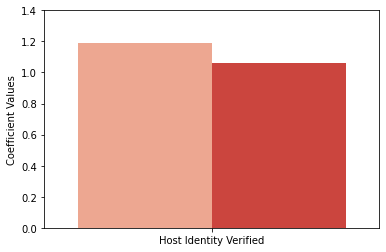

In [154]:
cod=['Pre','Post']
Cof=['Host Identity Verified','Host Identity Verified']
res=[1.1902,1.0581]

fig=sns.barplot(x =Cof,y = res,hue=cod,
                palette='Reds')
fig.set_ylim(0,1.4)

leg = fig.get_legend().remove()




fig.set(ylabel='Coefficient Values')
plt.show()

In [26]:
1-1.0581/1.1902

0.11098974962191221

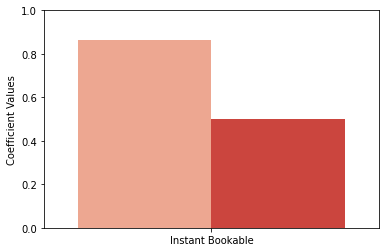

In [151]:
cod=['Pre','Post']
Cof=['Instant Bookable','Instant Bookable']
res=[0.8628, 0.5010]


fig=sns.barplot(x =Cof,y = res,hue=cod,
                palette='Reds')
fig.set_ylim(0,1)

leg = fig.get_legend().remove()



fig.set(ylabel='Coefficient Values')
plt.show()